<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Panel_reg_heter_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression analysis

In [ ]:
!pip install linearmodels

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

In [ ]:
# Load the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')
data_copy = data.copy()
data = data.drop(['Education', 'Women', 'Household', 'Age', 'Urban'], axis=1)

#Add data for heterogeneity
url = "https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Environment_awareness_long.csv"  # Remplacer par l'URL de votre fichier CSV sur GitHub
env_awareness_data = pd.read_csv(url)
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness']], on=['Country', 'Year'], how='left')# Inspect the first few rows of the data
data

,Country,Year,Waste,Income,Env Awareness
0,Belgium,2014,484.672171,21705.0,0.95
1,Bulgaria,2014,376.962939,3311.0,0.94
2,Czechia,2014,310.164578,7622.0,0.93
3,Denmark,2014,636.289226,27861.0,0.96
4,Germany,2014,456.714036,19733.0,0.94
...,...,...,...,...,...
229,Slovakia,2022,477.938297,8819.0,NaN
230,Finland,2022,301.988144,26541.0,NaN
231,Sweden,2022,410.815832,26738.0,NaN
232,Norway,2022,412.204001,39206.0,NaN


In [ ]:
# Convert 'Country' and 'Year' to categorical variables (if not already)
data['Country'] = data['Country'].astype('category')
data['Year'] = data['Year'].astype('category')

# Check for missing values
print(data.isnull().sum())
data = data[data['Country'] != 'Türkiye']
print(data.head())
num_countries = data['Country'].nunique()
print(f"Number of different countries: {num_countries}")
print(data.isnull().sum())

Country            0
Year               0
Waste              0
Income             0
Env Awareness    162
dtype: int64
    Country  Year       Waste   Income  Env Awareness
0   Belgium  2014  484.672171  21705.0           0.95
1  Bulgaria  2014  376.962939   3311.0           0.94
2   Czechia  2014  310.164578   7622.0           0.93
3   Denmark  2014  636.289226  27861.0           0.96
4   Germany  2014  456.714036  19733.0           0.94
Number of different countries: 25
Country            0
Year               0
Waste              0
Income             0
Env Awareness    153
dtype: int64


Il manque les data pour l'âge moyen en Turquie

In [ ]:
data['Year'] = data['Year'].astype(int)  # Or float if years are not integers

<ipython-input-626-a91a8917f5c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)  # Or float if years are not integers


In [ ]:
# Set 'Country' and 'Year' as index to create a MultiIndex
data = data.set_index(['Country', 'Year'])

In [ ]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

In [ ]:
# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0355
Estimator:                   PanelOLS   R-squared (Between):             -0.8298
No. Observations:                  72   R-squared (Within):              -0.2581
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.7180
Time:                        15:01:45   Log-likelihood                   -358.71
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.8086
Entities:                          24   P-value                           0.4520
Avg Obs:                       3.0000   Distribution:                    F(2,44)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.4461
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/l

In [ ]:
# Create the interaction term
data['Income_Awareness'] = data['Income'] * data['Env Awareness']

In [ ]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness', 'Income_Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model with interaction term
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")


                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0491
Estimator:                   PanelOLS   R-squared (Between):             -0.8002
No. Observations:                  72   R-squared (Within):              -0.2688
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.6963
Time:                        15:01:45   Log-likelihood                   -358.20
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.7406
Entities:                          24   P-value                           0.5337
Avg Obs:                       3.0000   Distribution:                    F(3,43)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.0312
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

In [ ]:
import numpy as np

# Transform 'Income' to its logarithm
data['Log_Income'] = np.log(data['Income'])


In [ ]:
# Update the interaction term to reflect the log transformation
data['Log_Income_Awareness'] = data['Log_Income'] * data['Env Awareness']
X['Log_Income_Awareness'] = data['Log_Income_Awareness']

# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Log_Income', 'Log_Income_Awareness', 'Env Awareness']]



# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)


/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/l

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0945
Estimator:                   PanelOLS   R-squared (Between):             -0.0655
No. Observations:                  72   R-squared (Within):               0.2476
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0043
Time:                        15:01:45   Log-likelihood                   -356.44
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.4962
Entities:                          24   P-value                           0.2291
Avg Obs:                       3.0000   Distribution:                    F(3,43)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.2463
                            

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm # Import statsmodels and alias it as sm

def variance_inflation_factor(exog, exog_idx):
    """
    Calculate the variance inflation factor (VIF) for a given exogenous variable.

    Parameters:
    exog (np.ndarray): The exogenous data matrix.
    exog_idx (int): The index of the exogenous variable to calculate VIF for.

    Returns:
    float: The VIF value.
    """
    # Extract the variable of interest and the remaining variables
    x_i = exog[:, exog_idx]
    x_not_i = np.delete(exog, exog_idx, axis=1)
    model = sm.OLS(x_i, x_not_i).fit()
    r_squared_i = model.rsquared
    vif = 1 / (1 - r_squared_i)
    print(f"VIF for {X.columns[exog_idx]}: {vif}")  # Afficher le VIF pour chaque variable
    return vif

# Assuming 'data' is your DataFrame containing 'Env Awareness', 'Log_Income', 'Log_Income_Awareness'
X = data[['Log_Income', 'Log_Income_Awareness', 'Env Awareness']]
# Drop rows with missing or infinite values before adding a constant
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(X)  # Add a constant term (required for VIF calculation)

# Calculate VIF for each variable in X (excluding the constant)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns[1:] # Exclude the constant term from the variable names
# Calcul et attribution des valeurs VIF :
vif_values = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif_data["VIF"] = vif_values # Attribuer les valeurs VIF à la colonne "VIF"


print(vif_data)


VIF for Log_Income: 842.7800319231774
VIF for Log_Income_Awareness: 1340.7078542126003
VIF for Env Awareness: 190.37593287457597
               Variable          VIF
0            Log_Income   842.780032
1  Log_Income_Awareness  1340.707854
2         Env Awareness   190.375933


# Heterogeneity

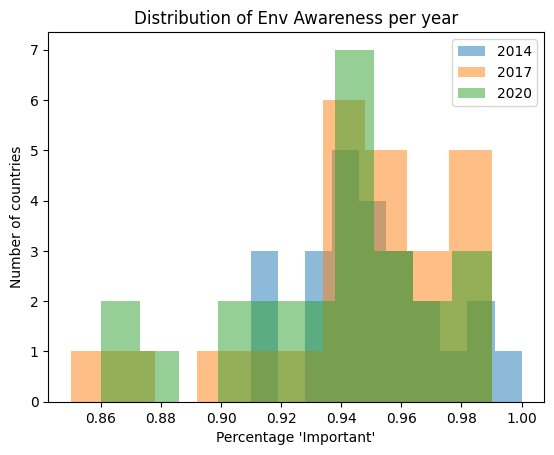

In [ ]:
#Choix du threshold

import matplotlib.pyplot as plt

# Filtrer les données pour chaque année
data_2014 = env_awareness_data[env_awareness_data['Year'] == 2014]['Env Awareness']
data_2017 = env_awareness_data[env_awareness_data['Year'] == 2017]['Env Awareness']
data_2020 = env_awareness_data[env_awareness_data['Year'] == 2020]['Env Awareness']

plt.hist(data_2014, bins=10, alpha=0.5, label='2014')
plt.hist(data_2017, bins=10, alpha=0.5, label='2017')
plt.hist(data_2020, bins=10, alpha=0.5, label='2020')

plt.xlabel("Percentage 'Important'")
plt.ylabel("Number of countries")
plt.title("Distribution of Env Awareness per year")
plt.legend(loc='upper right')
plt.show()

In [ ]:
#The distribution is symetrical in this range. We could use the median as a threshold.
#Extraire la colonne 'Env Awareness'
env_awareness_values = env_awareness_data['Env Awareness']

# Calculer le threshold
threshold = np.median(env_awareness_values)
print(f"The median of 'Env Awareness' is: {threshold}")

The median of 'Env Awareness' is: 0.95


In [ ]:
# Inspecter les premières lignes pour comprendre la structure des données
#print(env_awareness_data.head())

In [ ]:
# Créer la variable dummy
env_awareness_data['Env Awareness Dummy'] = (env_awareness_data['Env Awareness'] >= threshold).astype(int)

In [ ]:
# Fusionner les DataFrames en utilisant 'Country' et 'Year' comme clés
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness Dummy']], on=['Country', 'Year'], how='left')

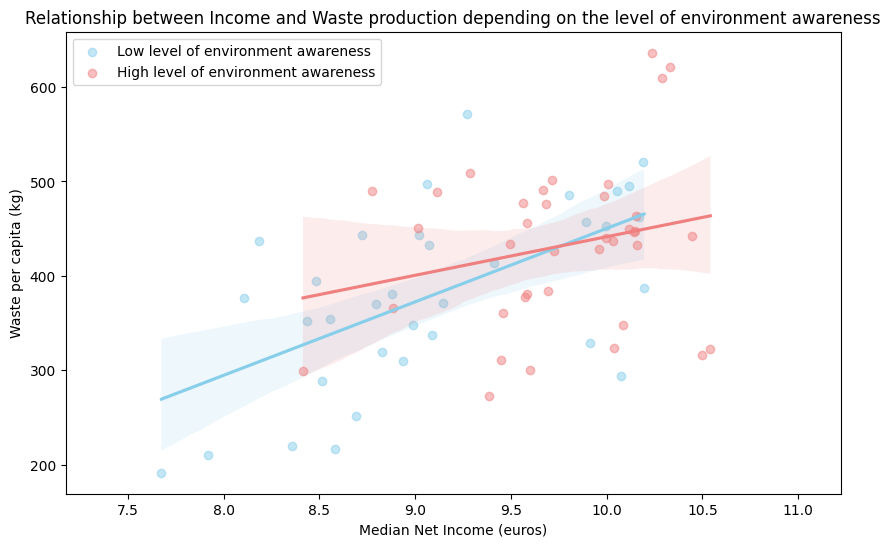

   Env Awareness Dummy   Intercept  Log_Income Coefficient  \
0                    0 -327.458232               77.777966   
1                    1   32.885185               40.863465   

   P-value (Log_Income)  R-squared  
0              0.000277   0.342551  
1              0.161707   0.053658  

Analyse de l'hétérogénéité:
---------------------------
L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.
La différence entre les coefficients d'Income est de 36.9145.
La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :
- Dummy = 0: p-value = 0.0003
- Dummy = 1: p-value = 0.1617


In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf # Import the necessary module and alias it as smf

# Régression pour dummy = 0
filtered_data_0 = data[data['Env Awareness Dummy'] == 0]
if len(filtered_data_0['Waste'].unique()) > 1 and len(filtered_data_0['Log_Income'].unique()) > 1:
    model_0 = smf.ols('Waste ~ Log_Income', data=filtered_data_0).fit()
else:
    print("Not enough unique values in data for dummy = 0 to perform regression.")

# Régression pour dummy = 1
filtered_data_1 = data[data['Env Awareness Dummy'] == 1]
if len(filtered_data_1['Waste'].unique()) > 1 and len(filtered_data_1['Log_Income'].unique()) > 1:
    model_1 = smf.ols('Waste ~ Log_Income', data=filtered_data_1).fit()
else:
    print("Not enough unique values in data for dummy = 1 to perform regression.")

# Créer le graphique
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique si nécessaire

# Use specified colors and limit x-axis
sns.regplot(x='Log_Income', y='Waste', data=filtered_data_0, label="Low level of environment awareness", scatter_kws={'alpha':0.5}, color='skyblue')
sns.regplot(x='Log_Income', y='Waste', data=filtered_data_1, label="High level of environment awareness", scatter_kws={'alpha':0.5}, color='lightcoral')

plt.xlabel("Median Net Income (euros)")
plt.ylabel("Waste per capita (kg)")
plt.title("Relationship between Income and Waste production depending on the level of environment awareness")
plt.legend()  # Afficher la légende pour identifier les deux régressions

# Limit x-axis
plt.xlim(data['Log_Income'].min() - 0.5, data['Log_Income'].max() + 0.5)  # Adjust values as needed

plt.show()

# Créer un DataFrame pour stocker les résultats
results_df = pd.DataFrame({
    'Env Awareness Dummy': [0, 1],
    'Intercept': [model_0.params['Intercept'], model_1.params['Intercept']],
    'Log_Income Coefficient': [model_0.params['Log_Income'], model_1.params['Log_Income']], # This is the column name you used
    'P-value (Log_Income)': [model_0.pvalues['Log_Income'], model_1.pvalues['Log_Income']],
    'R-squared': [model_0.rsquared, model_1.rsquared]
})

# Afficher le DataFrame
print(results_df)

# Analyse des résultats
print("\nAnalyse de l'hétérogénéité:")
print("---------------------------")
# Use 'Log_Income Coefficient' instead of 'Income Coefficient'
if results_df.loc[0, 'Log_Income Coefficient'] > results_df.loc[1, 'Log_Income Coefficient']:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.")
else:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 1.")

# Use 'Log_Income Coefficient' instead of 'Income Coefficient'
print(f"La différence entre les coefficients d'Income est de {results_df.loc[0, 'Log_Income Coefficient'] - results_df.loc[1, 'Log_Income Coefficient']:.4f}.")

print("La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :")
print(f"- Dummy = 0: p-value = {results_df.loc[0, 'P-value (Log_Income)']:.4f}")
print(f"- Dummy = 1: p-value = {results_df.loc[1, 'P-value (Log_Income)']:.4f}")

In [ ]:
#Coefficients OLS

url = "https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Environment_awareness_long.csv"  # Remplacer par l'URL de votre fichier CSV sur GitHub
env_awareness_data = pd.read_csv(url)
# Merge data_copy with env_awareness_data to add 'Env Awareness' column before using it
data_copy = pd.merge(data_copy, env_awareness_data[['Country', 'Year', 'Env Awareness']], on=['Country', 'Year'], how='left')# Inspect the first few rows of the data
data_copy['Income_Awareness'] = data_copy['Income'] * data_copy['Env Awareness']
data_copy['Log_Income'] = np.log(data_copy['Income'])
data_copy['Log_Income_Awareness'] = data_copy['Log_Income'] * data_copy['Env Awareness']

# Convert 'Country' and 'Year' to categorical variables (if not already)
data_copy['Country'] = data_copy['Country'].astype('category')
data_copy['Year'] = data_copy['Year'].astype(int)  # Or float if years are not integers
# Set 'Country' and 'Year' as index to create a MultiIndex
data_copy = data_copy.set_index(['Country', 'Year'])

# Define the dependent variable (Y) and independent variables (X)
Y = data_copy['Waste']
X = data_copy[['Log_Income', 'Env Awareness', 'Education', 'Age', 'Women', 'Urban', 'Household', 'Log_Income_Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)


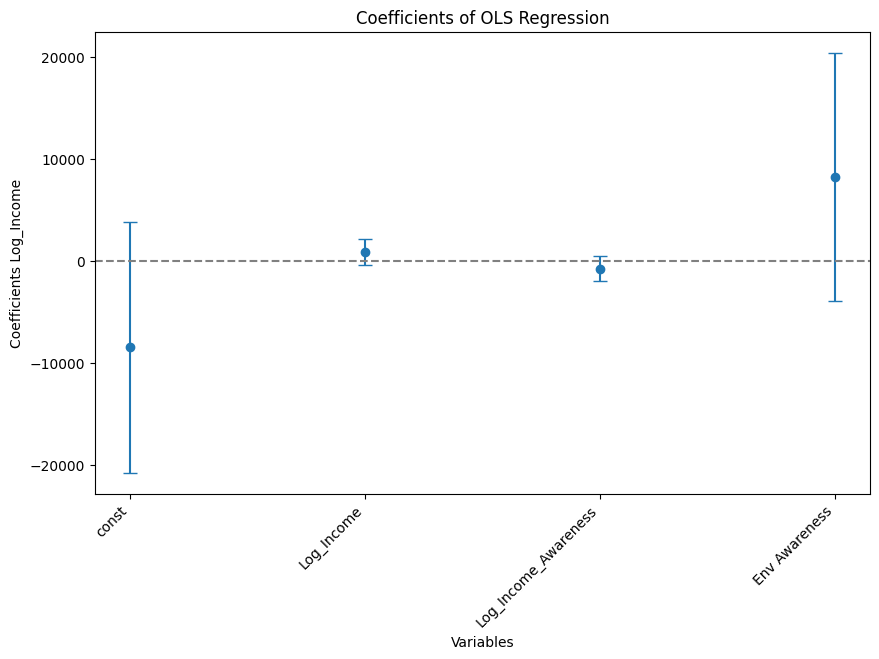

              Variable  Coefficient    Lower CI    Upper CI
Log_Income  Log_Income   870.147313 -382.669855  2122.96448


In [ ]:
# Extraire les coefficients et les intervalles de confiance
coefs = results.params  # Access parameters from the results object
conf_ints = results.conf_int()

# Créer un graphique des coefficients
plt.figure(figsize=(10, 6))
# Access confidence intervals using column names 'lower' and 'upper'
lower_error = coefs - conf_ints['lower']  # Changed from conf_ints[0]
upper_error = conf_ints['upper'] - coefs  # Changed from conf_ints[1]
yerr = np.vstack([lower_error, upper_error])  # Combine lower and upper errors for errorbar

plt.errorbar(coefs.index, coefs.values, yerr=yerr, fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Coefficients Log_Income')
plt.title('Coefficients of OLS Regression')
plt.show()

# Créer un DataFrame des résultats
results_df = pd.DataFrame({
    'Variable': coefs.index,
    'Coefficient': coefs.values,
    'Lower CI': conf_ints['lower'], # Changed from conf_ints[0]
    'Upper CI': conf_ints['upper']  # Changed from conf_ints[1]
})

# Afficher les résultats pour 'Income' dans chaque groupe de la dummy
print(results_df[results_df['Variable'].isin(['Log_Income', 'Q("Env Awareness Dummy")'])])

OLS Coefficient for Income (Low Awareness): 77.77796632757719
OLS Coefficient for Income (High Awareness): 40.86346490366997


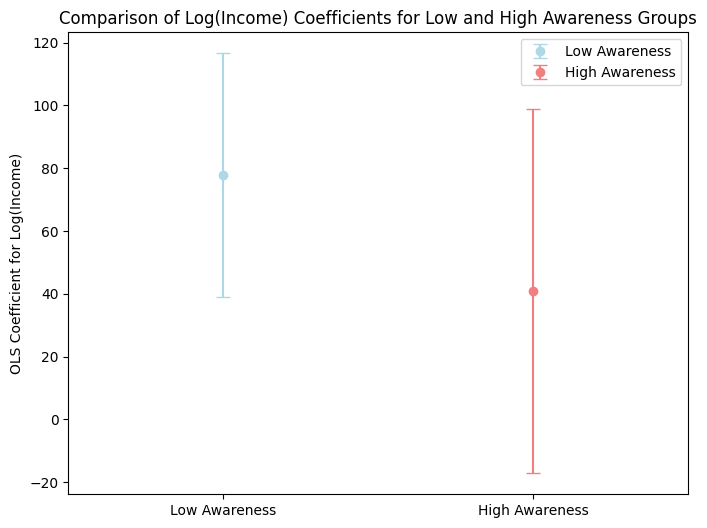

In [ ]:
# Régression pour dummy = 0 (low awareness)
filtered_data_0 = data[data['Env Awareness Dummy'] == 0]
if len(filtered_data_0['Waste'].unique()) > 1 and len(filtered_data_0['Log_Income'].unique()) > 1:
    model_0 = smf.ols('Waste ~ Log_Income', data=filtered_data_0).fit()
    income_coef_0 = model_0.params['Log_Income']  # Extract Income coefficient for low awareness group
    conf_int_0 = model_0.conf_int().loc['Log_Income']  # Get confidence intervals for Income
else:
    print("Not enough unique values in data for dummy = 0 to perform regression.")
    income_coef_0 = None  # Assign None if regression cannot be performed
    conf_int_0 = None  # Assign None if regression cannot be performed

# Régression pour dummy = 1 (high awareness)
filtered_data_1 = data[data['Env Awareness Dummy'] == 1]
if len(filtered_data_1['Waste'].unique()) > 1 and len(filtered_data_1['Income'].unique()) > 1:
    model_1 = smf.ols('Waste ~ Log_Income', data=filtered_data_1).fit()
    income_coef_1 = model_1.params['Log_Income']  # Extract Income coefficient for high awareness group
    conf_int_1 = model_1.conf_int().loc['Log_Income']  # Get confidence intervals for Income
else:
    print("Not enough unique values in data for dummy = 1 to perform regression.")
    income_coef_1 = None  # Assign None if regression cannot be performed
    conf_int_1 = None  # Assign None if regression cannot be performed

# Afficher les coefficients
print(f"OLS Coefficient for Income (Low Awareness): {income_coef_0}")
print(f"OLS Coefficient for Income (High Awareness): {income_coef_1}")

# Plotting the coefficients using plt.errorbar
groups = ['Low Awareness', 'High Awareness']
coefficients = [income_coef_0, income_coef_1]
conf_intervals = [model_0.conf_int().loc['Log_Income'], model_1.conf_int().loc['Log_Income']]
colors = ['lightblue', 'lightcoral']  # Colors for low and high awareness

plt.figure(figsize=(8, 6))

for i, group in enumerate(groups):
    plt.errorbar(
        i,
        coefficients[i],
        yerr=[[coefficients[i] - conf_intervals[i][0]], [conf_intervals[i][1] - coefficients[i]]],
        fmt='o',
        capsize=5,
        label=group,
        color=colors[i]  # Apply the desired color
    )

plt.xticks(range(len(groups)), groups)  # Set x-axis ticks to group names
plt.ylabel('OLS Coefficient for Log(Income)')
plt.title('Comparison of Log(Income) Coefficients for Low and High Awareness Groups')
plt.legend()  # Show legend
plt.xlim(-0.5, 1.5)
plt.show()